In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:

def sigmoid(x):
    return 1/(1+np.exp(-x))
  
def ReLU(x):
    #TODO
    pass

def softmax(x):
    #TODO
    pass

def costFunction(Y, P):
    n = Y.shape[0]
    cost = 1/n*-np.sum(Y * np.log(P) + (1-Y) * np.log(1-P))
    return cost

In [216]:
class Neural:

    class Layer:
        def __init__(self, inputLength, outputLength):
            self.weight = np.random.normal(0,1,(inputLength+1, outputLength))
        
        def feedforward(self, inputMatrix):
            A = np.c_[np.ones((inputMatrix.shape[0],1)), inputMatrix]
            return sigmoid(A @ self.weight)
        
        def feedbackward(self, inputVector, delta, learningRate, ridgeRegressionRate):
            a = np.c_[1,inputVector]
            newDelta = (delta.reshape(1,-1) @ self.weight.transpose()) * a * (1 - a)
            self.weight[1:,:] -= ridgeRegressionRate*self.weight[1:,:]
            self.weight += learningRate*np.outer(a, delta)
            return newDelta
            

    def __init__(self, layerSizes, activationFunction = sigmoid):
        self.Layers = []
        n = len(layerSizes)
        for i in range(1,n):
            self.Layers.append(self.Layer(layerSizes[i-1],layerSizes[i]))

    def feedForward(self, inputMatrix):
        output = inputMatrix
        for layer in self.Layers:
            output = sigmoid(layer.feedforward(output))
        return output

    def train(self, trainingSet, trainingLabels, alpha, lmbd, epochs):
        n = len(self.Layers)
        N = trainingSet.shape[0]
        for epoch in range(epochs):
            for k in range(N):
                x = trainingSet[k,:].reshape(1,-1)
                y = trainingLabels[k,:].reshape(1,-1)
                a = [x]
                for i in range(0, n):
                    a.append(self.Layers[i].feedforward(a[i]))
                delta = y - a[-1]
                for i in range(n-1,-1,-1):
                    delta = self.Layers[i].feedbackward(a[i], delta, alpha, lmbd)
                    delta = delta[:,1:]
            print("Epoch: {0}, Cost: {1}".format(epoch, costFunction(trainingLabels, self.feedForward(trainingSet))))
            
    def test(self, X, Y):
        return "Accuracy: {0}".format(np.sum(self.feedForward(X).argmax(axis=1)==Y.argmax(axis=1))/Y.shape[0])

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(10000, 784)


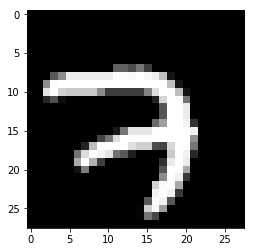

In [217]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels
print(X_train.shape)
print(X_test.shape)
plt.imshow(X_train[0,:].reshape(28,28), cmap = 'gray')
plt.show()

In [240]:
nn = Neural([784, 20, 10])

In [241]:
nn.feedForward(X_train[0,:].reshape(1,-1))

array([[0.71032814, 0.582376  , 0.70793406, 0.72974157, 0.51427689,
        0.53922683, 0.68678141, 0.71343512, 0.5721897 , 0.50847384]])

In [242]:
costFunction(Y_train,nn.feedForward(X_train))

9.545759045753208

In [ ]:
nn.train(X_train, Y_train, 0.1, 0.0001, 4)
print(nn.test(X_train, Y_train))
print(nn.test(X_test, Y_test))

Epoch: 0, Cost: 6.937940175070762
Epoch: 1, Cost: 6.93744081154904


In [19]:
save_err = np.seterr(all='call')

In [143]:
singleLayerNeuralNetwork = Neural([784, 10])

In [151]:
singleLayerNeuralNetwork.train(X_train, Y_train, 0.005, 5)
print(singleLayerNeuralNetwork.test(X_train, Y_train))
print(singleLayerNeuralNetwork.test(X_test, Y_test))

Epoch: 0, Cost: 6.698593887642146
Epoch: 1, Cost: 6.697728492211584
Epoch: 2, Cost: 6.696970979123581
Epoch: 3, Cost: 6.696301760658615
Epoch: 4, Cost: 6.695706105141086


Accuracy: 0.9098909090909091
Accuracy: 0.9091
